## Question 6

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### (a)  Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.

In [5]:
# Import Jennifer image
jennifer = cv.imread('a1images/a1images/jeniffer.jpg')
assert jennifer is not None

jennifer_hsv=cv.cvtColor(jennifer,cv.COLOR_BGR2HSV)
jennifer_rgb=cv.cvtColor(jennifer,cv.COLOR_BGR2RGB)

H,S,V= cv.split(jennifer_hsv)


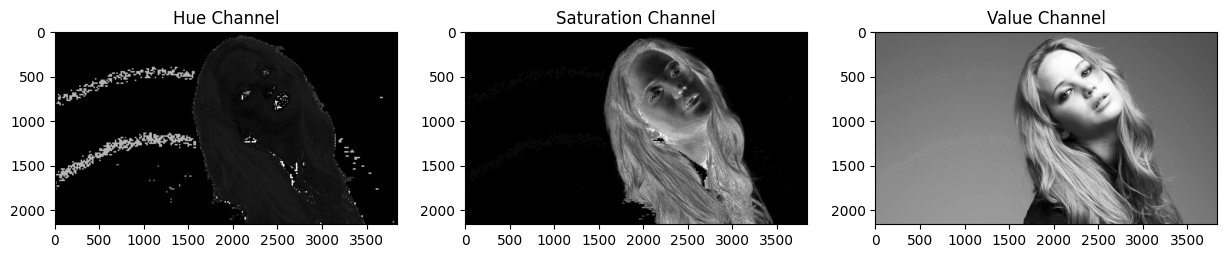

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Hue Channel')
plt.imshow(H, cmap='gray')
plt.subplot(1,3,2)
plt.title('Saturation Channel')
plt.imshow(S, cmap='gray')
plt.subplot(1,3,3)
plt.title('Value Channel')
plt.imshow(V, cmap='gray')
plt.show()


####  (b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.

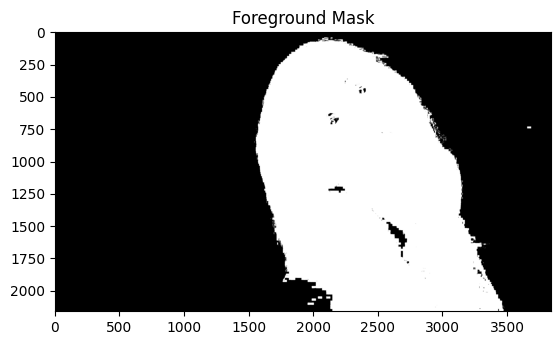

In [26]:
_,mask=cv.threshold(S, 11, 255, cv.THRESH_BINARY) #Threshhold selected as 11 to set the gray areas to 0 

plt.figure()
plt.title('Foreground Mask' )
plt.imshow(mask, cmap='gray')
plt.show()

#### (c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.


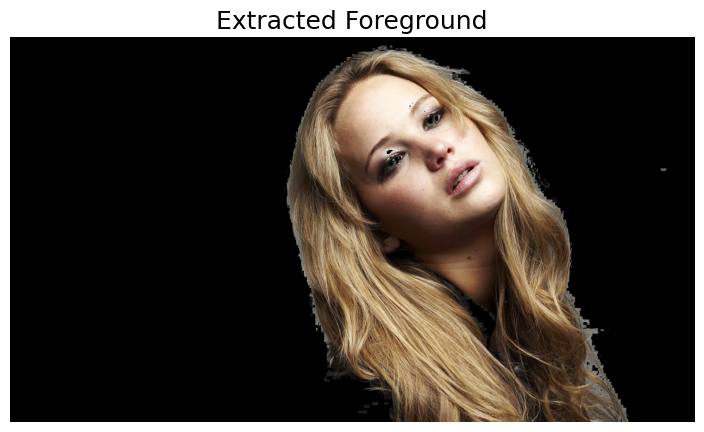

In [27]:
#apply bitwise_and to extract the foreground
foreground=cv.bitwise_and(jennifer, jennifer, mask=mask)

# Display the extracted foreground
plt.figure(figsize=(10, 5))

plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground', fontsize=18)
plt.axis('off')
plt.show()

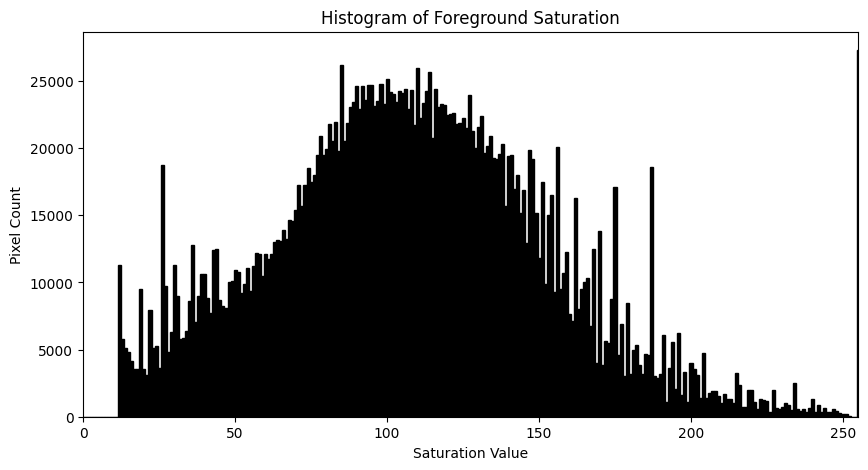

In [31]:
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
_, foreground_s, _ = cv.split(foreground_hsv)

# compute histogram
hist=cv.calcHist([foreground_s],[0],mask,[256],[0,256])

plt.figure(figsize=(10,5))
plt.title('Histogram of Foreground Saturation')
plt.xlabel('Saturation Value')
plt.ylabel('Pixel Count')

bins = np.arange(256)

plt.bar(bins, hist.flatten(), width=1.0, color='black', edgecolor='black')

plt.xlim([0, 255])
plt.show()



#### (d) Obtain the cumulative sum of the histogram using np.cumsum.

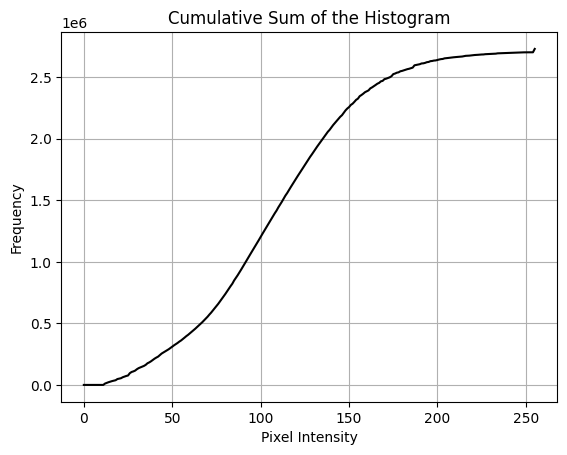

In [32]:
cdf = hist.cumsum()

# Plot the histogram
plt.figure()
plt.plot(cdf, color='black')
plt.title('Cumulative Sum of the Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### (e) Use the formulas in slides to histogram-equalize the foreground.

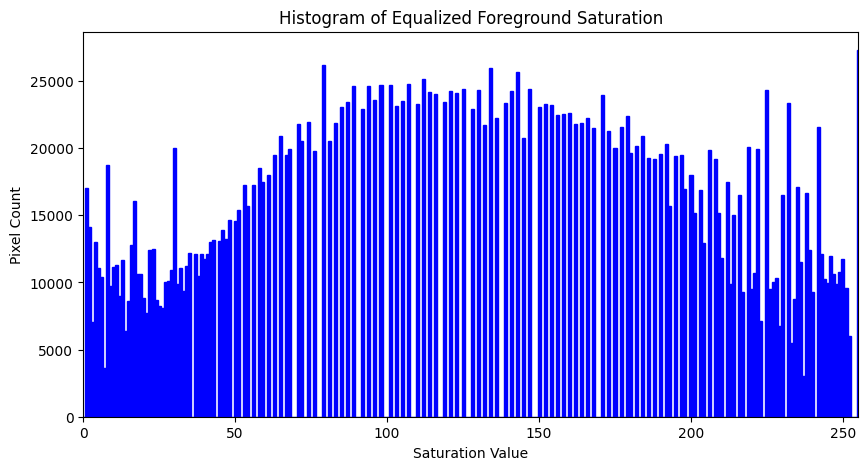

In [35]:

# Get the total number of foreground pixels
total_foreground_pixels = np.sum(mask > 0)

# Apply histogram equalization formula: T(k) = (L-1)/(M*N) * CDF(k)
equalized_lut = np.array([(255/total_foreground_pixels) * cdf[k] for k in range(256)], dtype=np.uint8)

# Apply the lookup table to equalize the saturation channel
equalized_s = equalized_lut[foreground_s]

# Reconstruct the HSV image with equalized saturation
equalized_hsv = cv.merge([H, equalized_s, V])

# Convert back to BGR
equalized_foreground = cv.cvtColor(equalized_hsv, cv.COLOR_HSV2BGR)

# Plot the equalized histogram
equalized_hist = cv.calcHist([equalized_s], [0], mask, [256], [0, 256])

plt.figure(figsize=(10, 5))
plt.title('Histogram of Equalized Foreground Saturation')
plt.xlabel('Saturation Value')
plt.ylabel('Pixel Count')
bins = np.arange(256)
plt.bar(bins, equalized_hist.flatten(), width=1.0, color='blue', edgecolor='blue')
plt.xlim([0, 255])
plt.show()

#### (f) Extract the background and add with the histogram equalized foreground

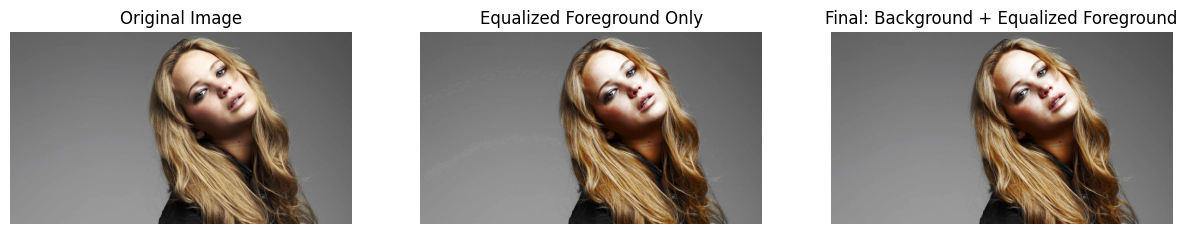

In [36]:
# Create inverse mask for background extraction
background_mask = cv.bitwise_not(mask)

# Extract background using inverse mask
background = cv.bitwise_and(jennifer, jennifer, mask=background_mask)

# Combine equalized foreground with background
# Use the original mask to select foreground pixels and inverse mask for background
final_image = cv.bitwise_and(equalized_foreground, equalized_foreground, mask=mask) + \
              cv.bitwise_and(background, background, mask=background_mask)

# Display the final result
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(jennifer, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(equalized_foreground, cv.COLOR_BGR2RGB))
plt.title('Equalized Foreground Only')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
plt.title('Final: Background + Equalized Foreground')
plt.axis('off')

plt.show()

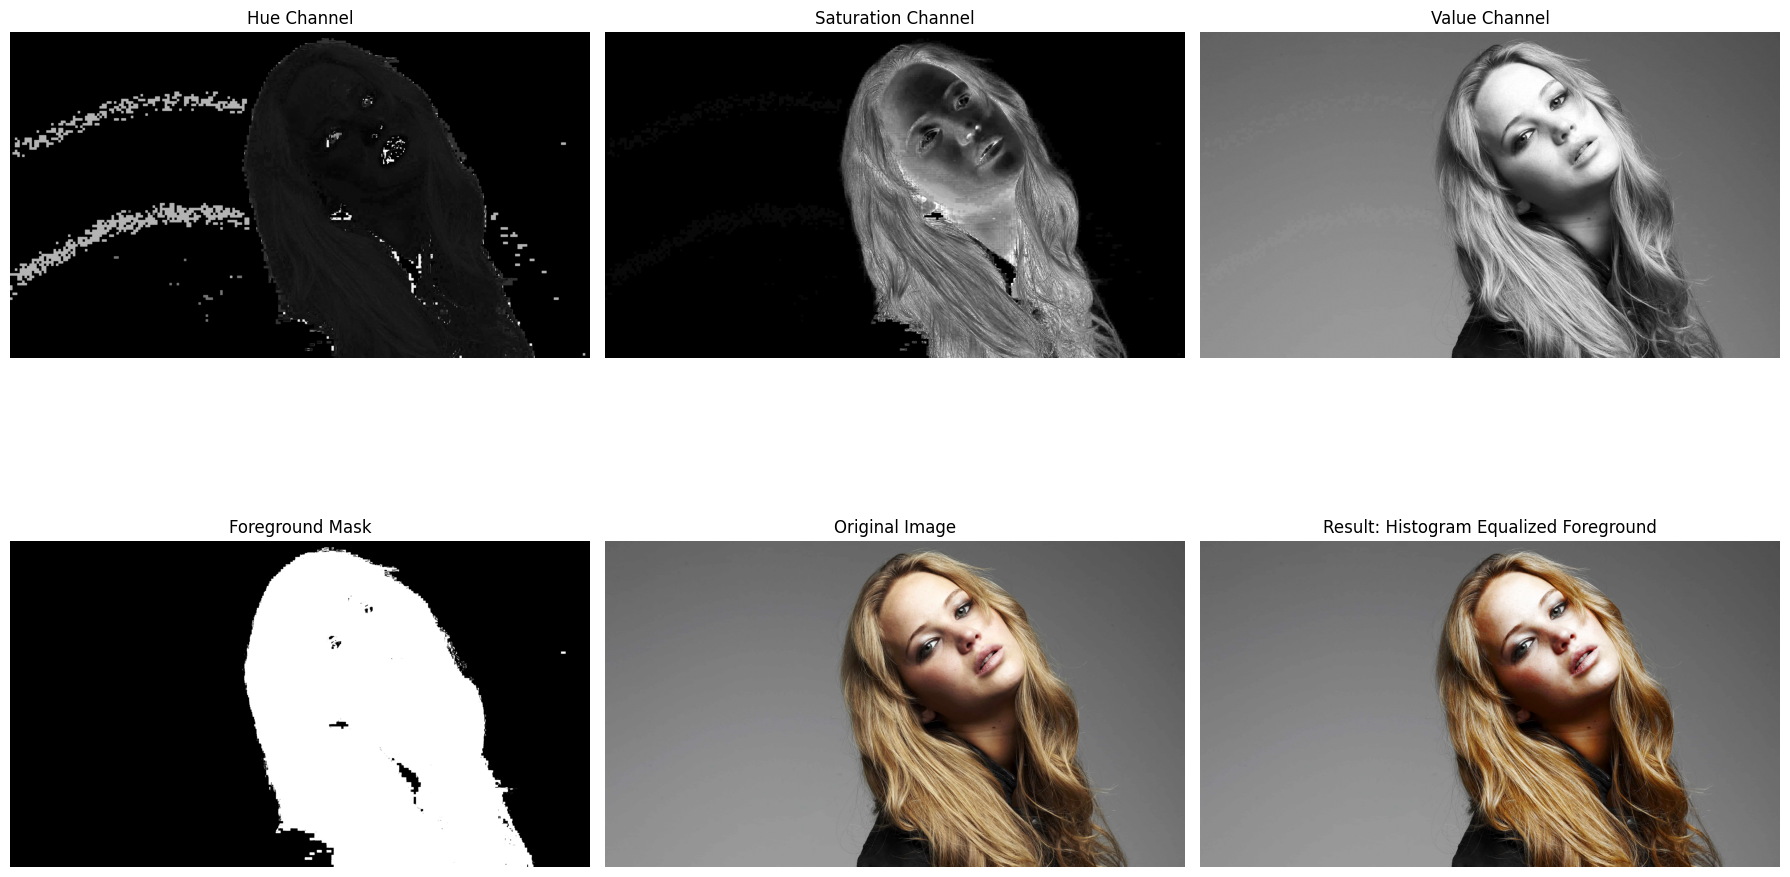

In [37]:
# Show the hue, saturation, and value plane, the mask, the original image, and the result
plt.figure(figsize=(18, 12))

# Hue plane
plt.subplot(2, 3, 1)
plt.imshow(H, cmap='gray')
plt.title('Hue Channel')
plt.axis('off')

# Saturation plane
plt.subplot(2, 3, 2)
plt.imshow(S, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

# Value plane
plt.subplot(2, 3, 3)
plt.imshow(V, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

# Mask
plt.subplot(2, 3, 4)
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

# Original image
plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(jennifer, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Final result with histogram equalized foreground
plt.subplot(2, 3, 6)
plt.imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
plt.title('Result: Histogram Equalized Foreground')
plt.axis('off')

plt.tight_layout()
plt.show()